In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter
import scipy.io

In [2]:
images_path = "flowers_dataset/jpg/"  # Change this to the actual path
segmasks_path = "flowers_dataset/segmim/"
labels_path = "imagelabels.mat"  # Change this to the actual path

In [3]:
def load_labels(labels_path):
    mat = scipy.io.loadmat(labels_path)
    labels = mat['labels'][0]
    return labels

In [4]:
def load_dataset(images_path, segmasks_path, labels_path):
    images = []
    segmasks = []
    labels = load_labels(labels_path)
    image_files = sorted(os.listdir(images_path))  # Ensure consistent ordering
    segmask_files = sorted(os.listdir(segmasks_path))  # Ensure consistent ordering
    
    for image_file, segmask_file in zip(image_files, segmask_files):
        image_path = os.path.join(images_path, image_file)
        segmask_path = os.path.join(segmasks_path, segmask_file)
        
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            images.append(image_path)
        
        if segmask_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            segmasks.append(segmask_path)
    
    return images, segmasks, labels

images, segmasks, labels = load_dataset(images_path, segmasks_path, labels_path)


In [5]:
if images:
    label_counts = Counter(labels)
    categories = list(label_counts.keys())
    counts = list(label_counts.values())
    
else:
    print("No images or segmentation masks to process.")
    raise SystemExit


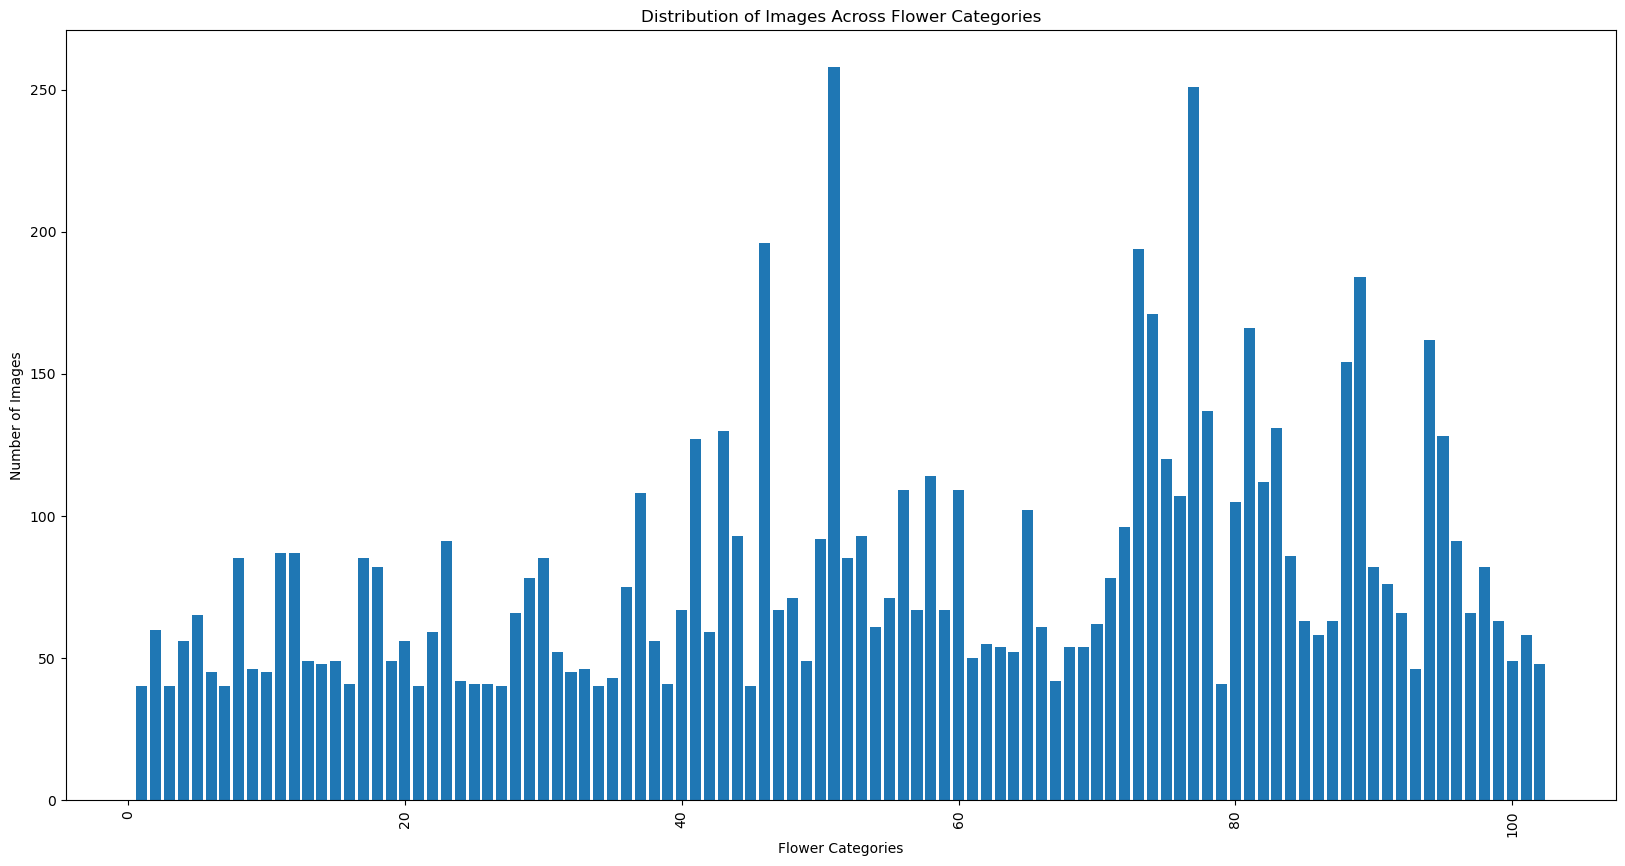

In [6]:
# 1. Analyze the distribution of images across categories

# Plot the distribution
plt.figure(figsize=(20, 10))
plt.bar(categories, counts)
plt.xlabel('Flower Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Flower Categories')
plt.xticks(rotation=90)
plt.show()

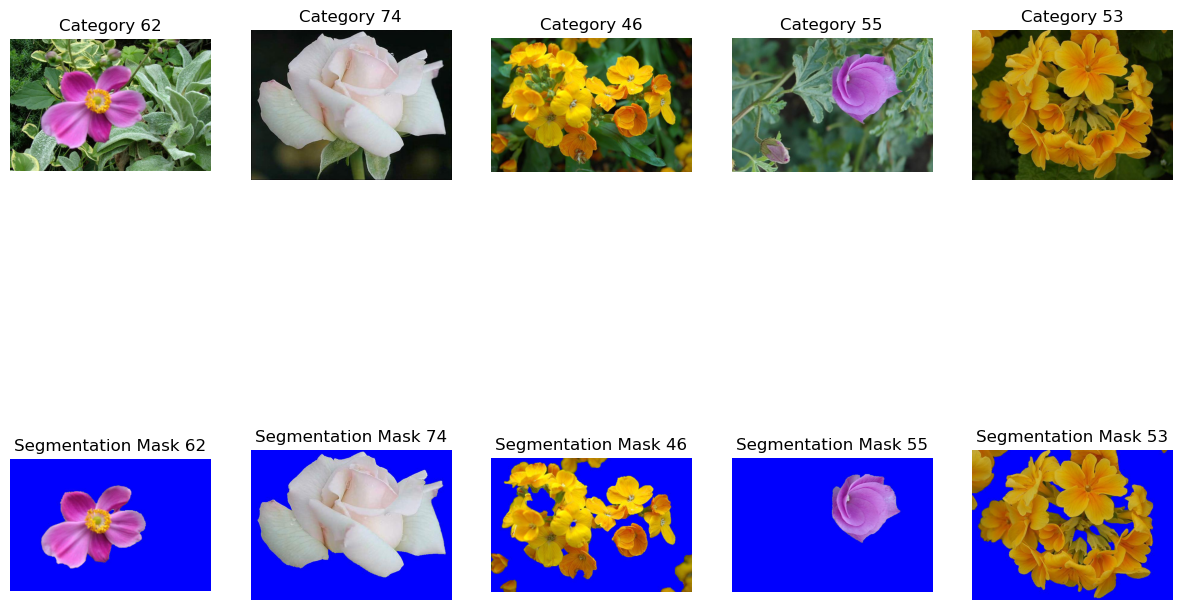

In [7]:
# 2. Visualize some example images with their segmentation masks
def show_examples(images, segmasks, labels, num_examples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_examples):
        idx = np.random.randint(len(images))
        img = Image.open(images[idx])
        segmask = Image.open(segmasks[idx])
        
        plt.subplot(2, num_examples, i+1)
        plt.imshow(img)
        plt.title(f"Category {labels[idx]}")
        plt.axis('off')
        
        plt.subplot(2, num_examples, num_examples + i + 1)
        plt.imshow(segmask, cmap='gray')
        plt.title(f"Segmentation Mask {labels[idx]}")
        plt.axis('off')
    plt.show()

show_examples(images, segmasks, labels)

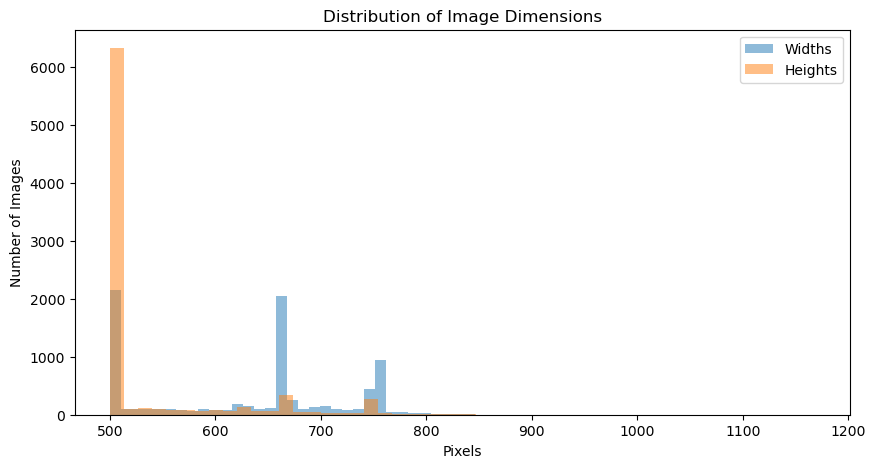

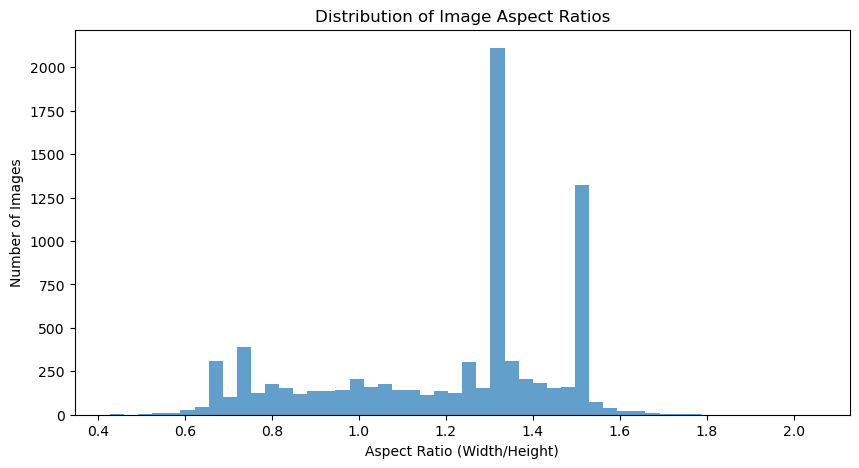

In [8]:
# 3. Check image dimensions and aspect ratios
def analyze_image_dimensions(images):
    dimensions = []
    for image_path in images:
        img = Image.open(image_path)
        dimensions.append(img.size)
    return dimensions

dimensions = analyze_image_dimensions(images)
widths, heights = zip(*dimensions)
aspect_ratios = [w / h for w, h in dimensions]

# Plot image dimensions
plt.figure(figsize=(10, 5))
plt.hist(widths, bins=50, alpha=0.5, label='Widths')
plt.hist(heights, bins=50, alpha=0.5, label='Heights')
plt.xlabel('Pixels')
plt.ylabel('Number of Images')
plt.title('Distribution of Image Dimensions')
plt.legend()
plt.show()

# Plot aspect ratios
plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=50, alpha=0.7)
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Number of Images')
plt.title('Distribution of Image Aspect Ratios')
plt.show()

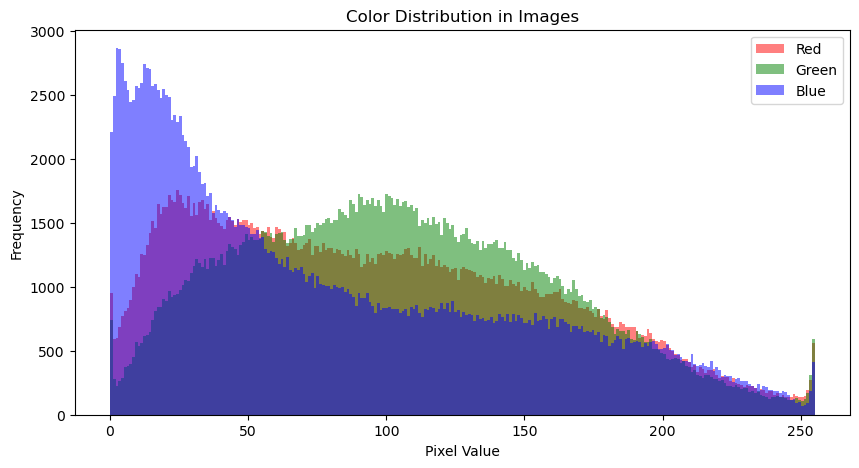

In [9]:
# 4. Analyze color distribution
def analyze_color_distribution(images, num_samples=100):
    colors = []
    for image_path in images[:num_samples]:
        img = Image.open(image_path)
        img = img.resize((50, 50))  # Resize for faster processing
        img_np = np.array(img)
        colors.extend(img_np.reshape(-1, 3))
    return colors

colors = analyze_color_distribution(images)

# Plot color distribution
colors = np.array(colors)
plt.figure(figsize=(10, 5))
plt.hist(colors[:, 0], bins=256, alpha=0.5, color='red', label='Red')
plt.hist(colors[:, 1], bins=256, alpha=0.5, color='green', label='Green')
plt.hist(colors[:, 2], bins=256, alpha=0.5, color='blue', label='Blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Color Distribution in Images')
plt.legend()
plt.show()

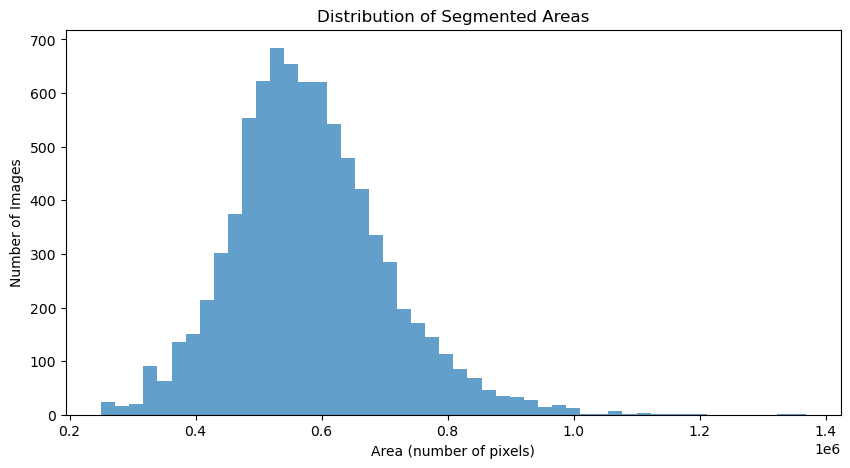

In [10]:
# 5. Analyze properties of segmented regions
def analyze_segmented_areas(segmasks):
    areas = []
    for segmask_path in segmasks:
        segmask = Image.open(segmask_path)
        segmask_np = np.array(segmask)
        areas.append(np.sum(segmask_np > 0))  # Count non-zero pixels
    return areas

segmented_areas = analyze_segmented_areas(segmasks)

# Plot segmented areas
plt.figure(figsize=(10, 5))
plt.hist(segmented_areas, bins=50, alpha=0.7)
plt.xlabel('Area (number of pixels)')
plt.ylabel('Number of Images')
plt.title('Distribution of Segmented Areas')
plt.show()